In [2]:
import pandas as pd
import os
import seaborn as sns
%matplotlib inline
import matplotlib
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt

In [3]:
#设定数据目录和工作目录
Data_dir = os.getcwd() + "\\Data\\"
Out_dir = os.getcwd() + "\\Out_put\\"
Data_dir,Out_dir

('C:\\Users\\Administrator\\Desktop\\大作业\\Data\\',
 'C:\\Users\\Administrator\\Desktop\\大作业\\Out_put\\')

# 读入数据集

In [4]:
df = pd.read_csv(open(Data_dir + "CDNOW.txt"),header = None,names=['客户编码','购买日期','数量','金额'],sep = '\s+')

In [5]:
df.head()

,客户编码,购买日期,数量,金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


# 数据集信息及清洗 

In [6]:
df.describe()

,客户编码,购买日期,数量,金额
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
客户编码    69659 non-null int64
购买日期    69659 non-null int64
数量      69659 non-null int64
金额      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [8]:
#转换为合适的数据格式
df.客户编码 = df.客户编码.astype('str')
df.购买日期 = pd.to_datetime(df.购买日期, format = '%Y%m%d')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
客户编码    69659 non-null object
购买日期    69659 non-null datetime64[ns]
数量      69659 non-null int64
金额      69659 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [10]:
df['购买年'] = df.购买日期.dt.year
df['购买年'] = df['购买年'].astype('int')
df['购买月'] = df.购买日期.dt.month
df['购买月'] = df['购买月'].astype('int')
df['购买日'] = df.购买日期.dt.day
df['购买日'] = df['购买日'].astype('int')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 7 columns):
客户编码    69659 non-null object
购买日期    69659 non-null datetime64[ns]
数量      69659 non-null int64
金额      69659 non-null float64
购买年     69659 non-null int32
购买月     69659 non-null int32
购买日     69659 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(1)
memory usage: 2.9+ MB


In [12]:
df.head()

,客户编码,购买日期,数量,金额,购买年,购买月,购买日
0,1,1997-01-01,1,11.77,1997,1,1
1,2,1997-01-12,1,12.00,1997,1,12
2,2,1997-01-12,5,77.00,1997,1,12
3,3,1997-01-02,2,20.76,1997,1,2
4,3,1997-03-30,2,20.76,1997,3,30


In [13]:
df.index.name="序号"
df.head()

,客户编码,购买日期,数量,金额,购买年,购买月,购买日
序号,,,,,,,
0,1,1997-01-01,1,11.77,1997,1,1
1,2,1997-01-12,1,12.00,1997,1,12
2,2,1997-01-12,5,77.00,1997,1,12
3,3,1997-01-02,2,20.76,1997,1,2
4,3,1997-03-30,2,20.76,1997,3,30


In [14]:
df.tail()

,客户编码,购买日期,数量,金额,购买年,购买月,购买日
序号,,,,,,,
69654,23568,1997-04-05,4,83.74,1997,4,5
69655,23568,1997-04-22,1,14.99,1997,4,22
69656,23569,1997-03-25,2,25.74,1997,3,25
69657,23570,1997-03-25,3,51.12,1997,3,25
69658,23570,1997-03-26,2,42.96,1997,3,26


In [15]:
#加入每次购买的单价
df['单价'] = df['金额']/df['数量']

In [16]:
df.head()

,客户编码,购买日期,数量,金额,购买年,购买月,购买日,单价
序号,,,,,,,,
0,1,1997-01-01,1,11.77,1997,1,1,11.77
1,2,1997-01-12,1,12.00,1997,1,12,12.00
2,2,1997-01-12,5,77.00,1997,1,12,15.40
3,3,1997-01-02,2,20.76,1997,1,2,10.38
4,3,1997-03-30,2,20.76,1997,3,30,10.38


In [17]:
#加入订单编号
df['订单编号'] = df.index
df.head()

,客户编码,购买日期,数量,金额,购买年,购买月,购买日,单价,订单编号
序号,,,,,,,,,
0,1,1997-01-01,1,11.77,1997,1,1,11.77,0
1,2,1997-01-12,1,12.00,1997,1,12,12.00,1
2,2,1997-01-12,5,77.00,1997,1,12,15.40,2
3,3,1997-01-02,2,20.76,1997,1,2,10.38,3
4,3,1997-03-30,2,20.76,1997,3,30,10.38,4


# 1、每年单价的情况


In [18]:
Price_year = df.groupby(['购买年'])[['金额','数量']].sum()

In [19]:
Price_year

,金额,数量
购买年,,
1997,2024161.26,134945
1998,476154.37,32936


In [20]:
Price_year['单价'] = Price_year['金额']/Price_year['数量']
Price_year

,金额,数量,单价
购买年,,,
1997,2024161.26,134945,14.999898
1998,476154.37,32936,14.456958


In [21]:
Cus_year = df.groupby(['购买年'])[['客户编码']].count()

In [22]:
Cus_year

,客户编码
购买年,
1997,56902
1998,12757


In [23]:
year = pd.merge(Price_year,Cus_year,on="购买年")

In [24]:
year

,金额,数量,单价,客户编码
购买年,,,,
1997,2024161.26,134945,14.999898,56902
1998,476154.37,32936,14.456958,12757


其销量和单价逐年下降,同时也可以发现97年和98年的年度活跃客户数量差距极大。

# 2 、客户和购买量

In [25]:
User = df.pivot_table(['金额'],index='客户编码',columns='购买年')

In [26]:
User.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 5374 entries, 100 to 9993
Data columns (total 2 columns):
(金额, 1997)    5374 non-null float64
(金额, 1998)    5374 non-null float64
dtypes: float64(2)
memory usage: 126.0+ KB


仅有5374家连续两年留存，仅仅不到97年的10%。说明该商家的商业模式不具备持续性。

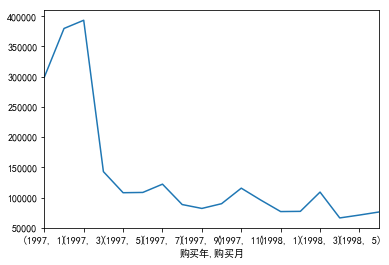

In [27]:
#计算并显示各个月的销售额
df.groupby(['购买年','购买月']).金额.sum().plot()

总销售各逐月下降

In [34]:
df.groupby(['购买年','购买月']).金额.sum().min()

66231.52

In [35]:
df.groupby(['购买年','购买月']).金额.sum().max()

393155.2699999832

In [38]:
round(df.groupby(['购买年','购买月']).金额.sum().max()/df.groupby(['购买年','购买月']).金额.sum().min())

6.0

月度最大销售额差距为6倍。 从曲线上来看，消费呈现一定的周期性。

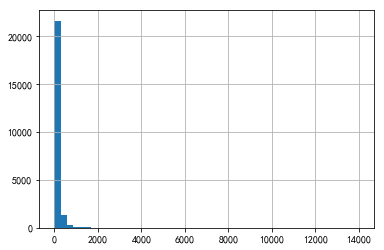

In [51]:
#通过客户消费总额来评价客户价值
df.groupby('客户编码').金额.sum().hist(bins = 50)

几乎没有高消费客户。一般CD在数字歌曲时代，也缺乏高消费的需求。

In [57]:
df.groupby('客户编码').金额.sum()

客户编码
1         11.77
10        39.31
100       55.24
1000       8.99
10000     77.42
10001     19.78
10002     77.21
10003     62.49
10004     35.40
10005     88.80
10006     65.92
10007     14.99
10008     25.34
10009    399.97
1001      73.03
10010    145.38
10011     54.48
10012     16.99
10013      9.77
10014     14.96
10015     20.76
10016     44.49
10017    152.16
10018     66.79
10019    192.36
1002      44.22
10020     40.97
10021    135.68
10022     38.10
10023     27.94
          ...  
9972      40.76
9973     944.70
9974      13.97
9975     495.70
9976      13.97
9977      65.33
9978      15.36
9979      24.90
998      279.87
9980      21.75
9981      14.96
9982     209.38
9983      42.69
9984     180.67
9985      25.28
9986      75.21
9987      19.99
9988      42.92
9989      46.08
999      102.15
9990       7.78
9991      37.71
9992      29.77
9993     581.16
9994      48.74
9995      24.54
9996      13.58
9997       8.77
9998      10.77
9999      50.71
Name: 金额, Length: 2

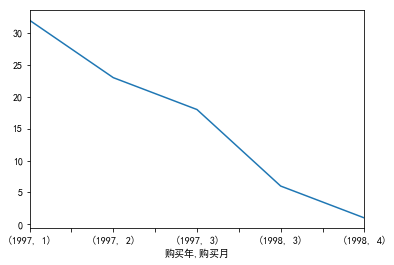

In [58]:
df[df['金额'] == 0].groupby(['购买年','购买月']).数量.sum().plot()

In [59]:
df[df['金额'] == 0].groupby(['购买年','购买月']).数量.sum().max()

32

其特价订单虽然逐日下降，但是其最大也就一个月32单,说明其促销力度一般，或者几乎不促销。

In [60]:
df.describe().round()

,数量,金额,购买年,购买月,购买日,单价,订单编号
count,69659.0,69659.0,69659.0,69659.0,69659.0,69659.0,69659.0
mean,2.0,36.0,1997.0,4.0,15.0,15.0,34829.0
std,2.0,36.0,0.0,3.0,9.0,9.0,20109.0
min,1.0,0.0,1997.0,1.0,1.0,0.0,0.0
25%,1.0,14.0,1997.0,2.0,8.0,12.0,17414.0
50%,2.0,26.0,1997.0,3.0,15.0,14.0,34829.0
75%,3.0,44.0,1997.0,6.0,23.0,15.0,52244.0
max,99.0,1286.0,1998.0,12.0,31.0,306.0,69658.0


通过购买金额显示,大多数单据的销售额都维持在43美金以下，说明客户的销售金额普遍不高，一般也没有客户愿意一次性大批量购买。其中有销售额为0的订单，估计是赠品单。

In [61]:
#对订单进行分类,将金额为0的记为特价,其他为正常
df['订单类型'] = df.金额.apply(lambda x: "特价" if  x==0  else "正常")
df[df['金额'] == 0].head()

,客户编码,购买日期,数量,金额,购买年,购买月,购买日,单价,订单编号,订单类型
序号,,,,,,,,,,
1548,455,1997-01-02,1,0.0,1997,1,2,0.0,1548,特价
2446,713,1997-01-03,1,0.0,1997,1,3,0.0,2446,特价
3066,908,1997-01-04,1,0.0,1997,1,4,0.0,3066,特价
3118,925,1997-01-04,1,0.0,1997,1,4,0.0,3118,特价
3623,1101,1997-01-05,1,0.0,1997,1,5,0.0,3623,特价
